# Graph kernel の使用例
ソースファイル：[https://github.com/BorgwardtLab/graph-kernels/blob/develop/src/R/graphkernels_2.0.tar.gz](https://github.com/BorgwardtLab/graph-kernels/blob/develop/src/R/graphkernels_2.0.tar.gz)

ターミナルから以下でインストール
```
 $ R CMD INSTALL graphkernels_2.0.tar.gz
```

## ライブラリを読み込む

In [3]:
require(graphkernels)

## データの読み込み

In [4]:
data(mutag)

## 各グラフの表示

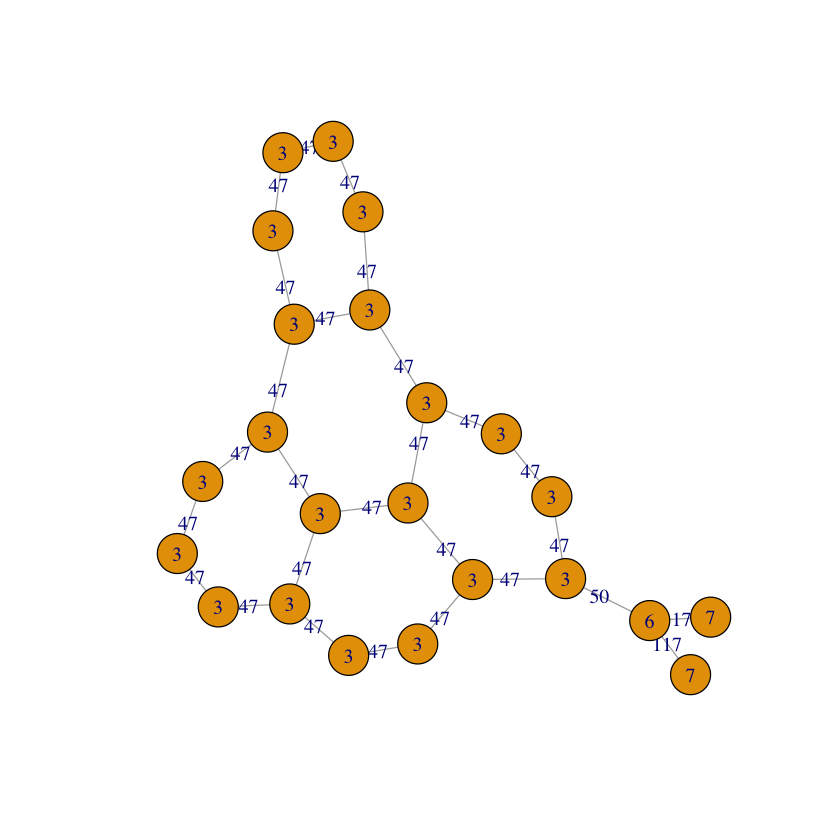

In [5]:
plot(mutag[[1]])

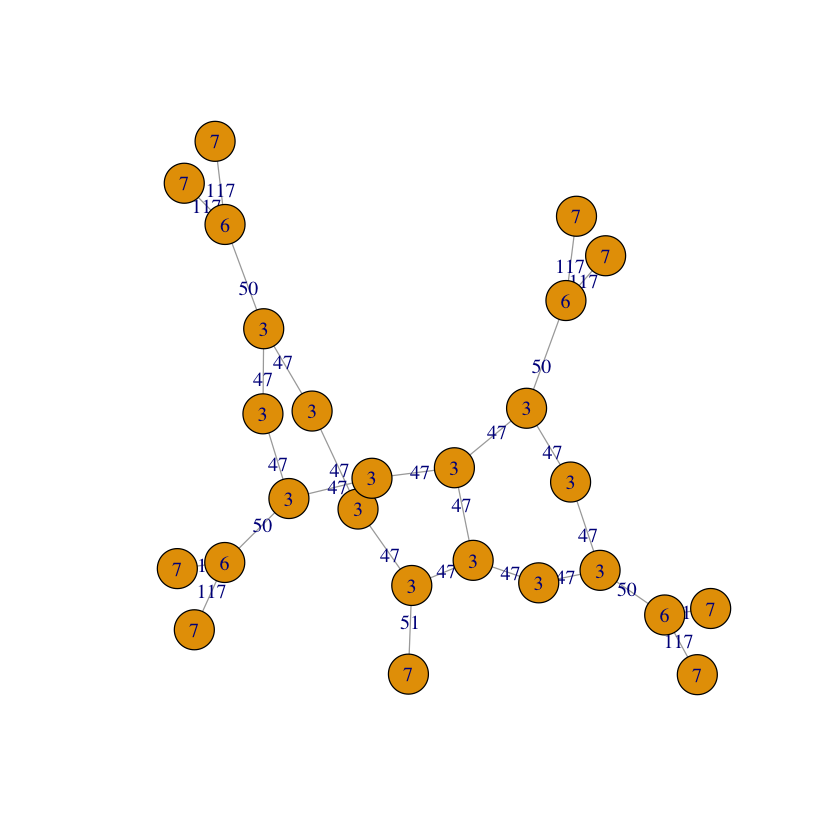

In [6]:
plot(mutag[[2]])

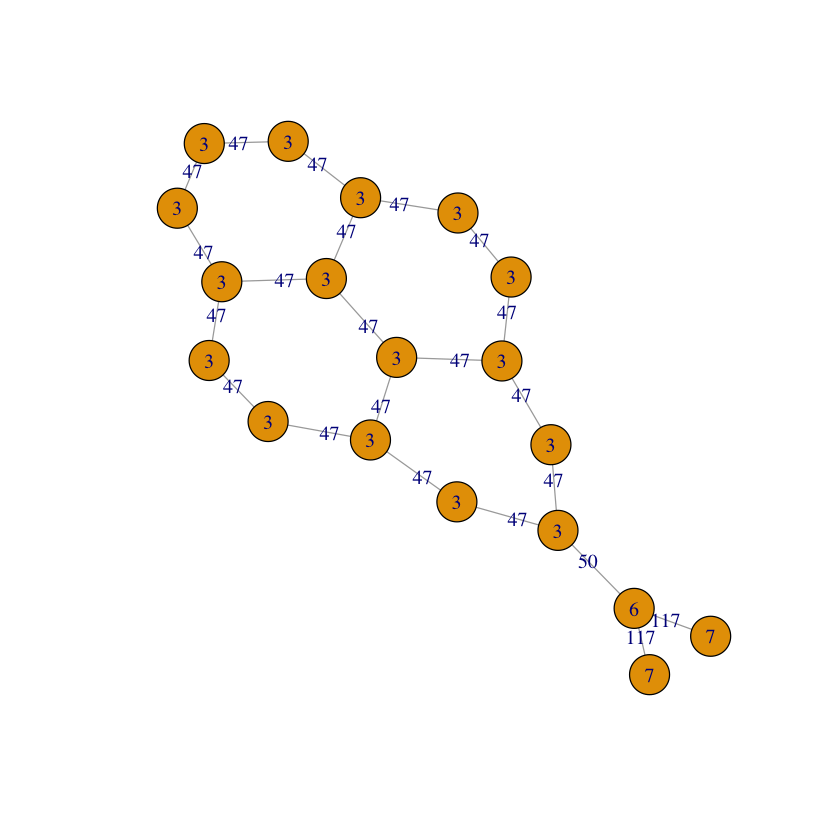

In [7]:
plot(mutag[[3]])

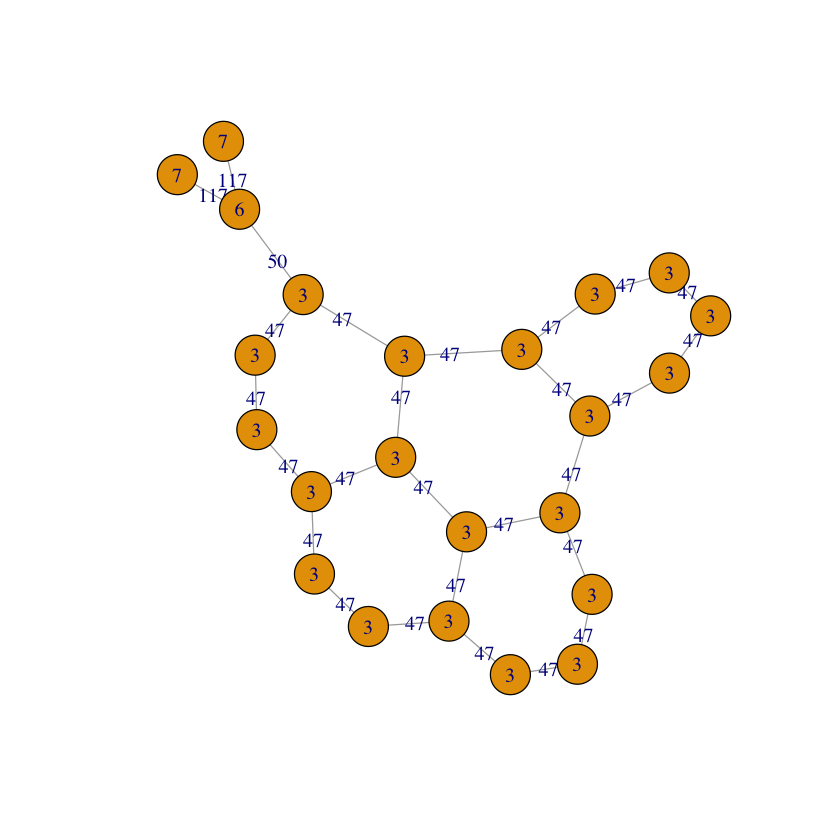

In [8]:
plot(mutag[[4]])

# グラフカーネルの計算
（例：WLカーネル）

In [9]:
K <- CalculateWLKernel(mutag, 2, store.features = TRUE)

In [10]:
K$kernel[1:10, 1:10]

683,404,536,679,346,521,532,548,742,445
404,502,340,406,270,344,466,336,502,300
536,340,451,540,283,429,426,424,598,362
679,406,540,679,346,524,527,543,740,445
346,270,283,346,237,277,306,280,392,240
521,344,429,524,277,424,416,414,586,350
532,466,426,527,306,416,523,437,608,369
548,336,424,543,280,414,437,443,592,357
742,502,598,740,392,586,608,592,848,494
445,300,362,445,240,350,369,357,494,313


In [11]:
head(K$hash)

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

[[4]]
[1] 4

[[5]]
[1] 5

[[6]]
[1] 6

In [12]:
head(K$feature)

1,2,3,4,5,6,7,8,9,10,⋯,206,207,208,209,210,211,212,213,214,215
0,0,20,0,0,1,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
0,0,13,0,0,4,9,0,0,0,⋯,0,1,0,0,0,0,0,0,0,8
0,0,16,0,0,1,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
0,0,20,0,0,1,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
0,0,12,0,0,3,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
0,0,16,0,0,1,3,0,0,0,⋯,0,1,0,0,0,0,0,0,0,2


# tSNEを使って可視化する
## まずインストール

In [13]:
install.packages("Rtsne")

Installing package into ‘/opt/homebrew/lib/R/4.0/site-library’
(as ‘lib’ is unspecified)



## プロットしてみる

In [15]:
require(Rtsne)

Loading required package: Rtsne



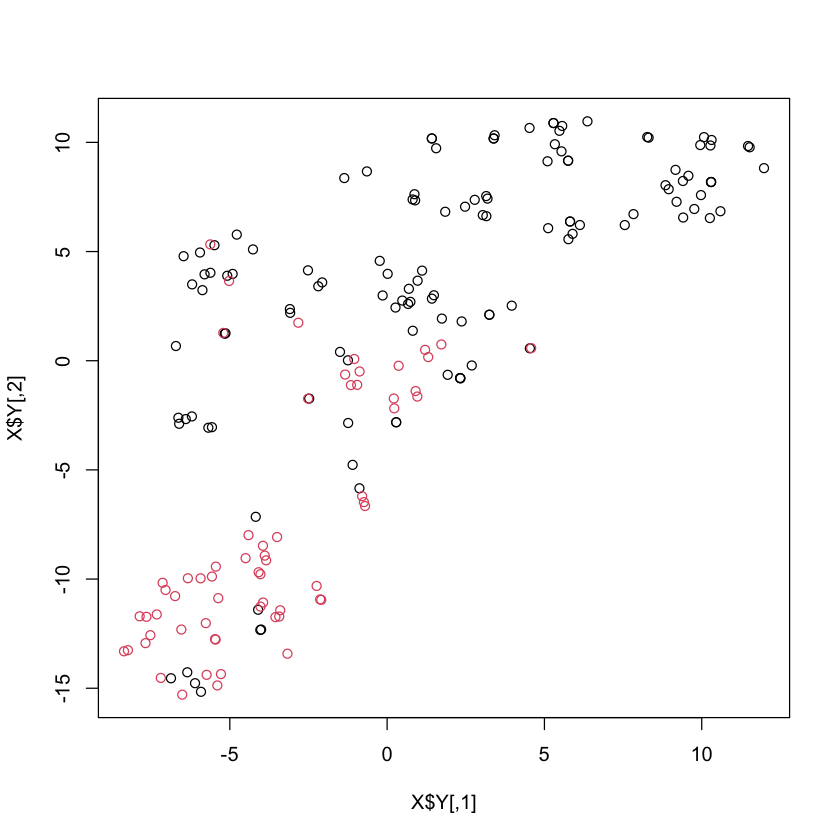

In [16]:
X <- Rtsne(K$feature, check_duplicates = FALSE)
y <- sapply(mutag, function(x) x$label)
plot(X$Y, col = y + 1)

# SVMで分類する
## まずインストール

In [17]:
install.packages("kernlab")

Installing package into ‘/opt/homebrew/lib/R/4.0/site-library’
(as ‘lib’ is unspecified)



## 分類してみる

In [19]:
require(kernlab)

In [20]:
holdout <- c(which(y == 0)[1:10], which(y == 1)[1:10])
classifier <- ksvm(as.kernelMatrix(K$kernel[-holdout, -holdout]), y[-holdout], type = "C-svc", kernel = "matrix", scaling = FALSE, C = .01)
Ktest <- K$kernel[holdout, -holdout][,SVindex(classifier), drop = FALSE]
ypred <- predict(classifier, as.kernelMatrix(Ktest))
ypred == y[holdout]

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
[13]  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE

In [21]:
sum(ypred == y[holdout]) / length(holdout)

[1] 0.7

# クラスタリングしてみる

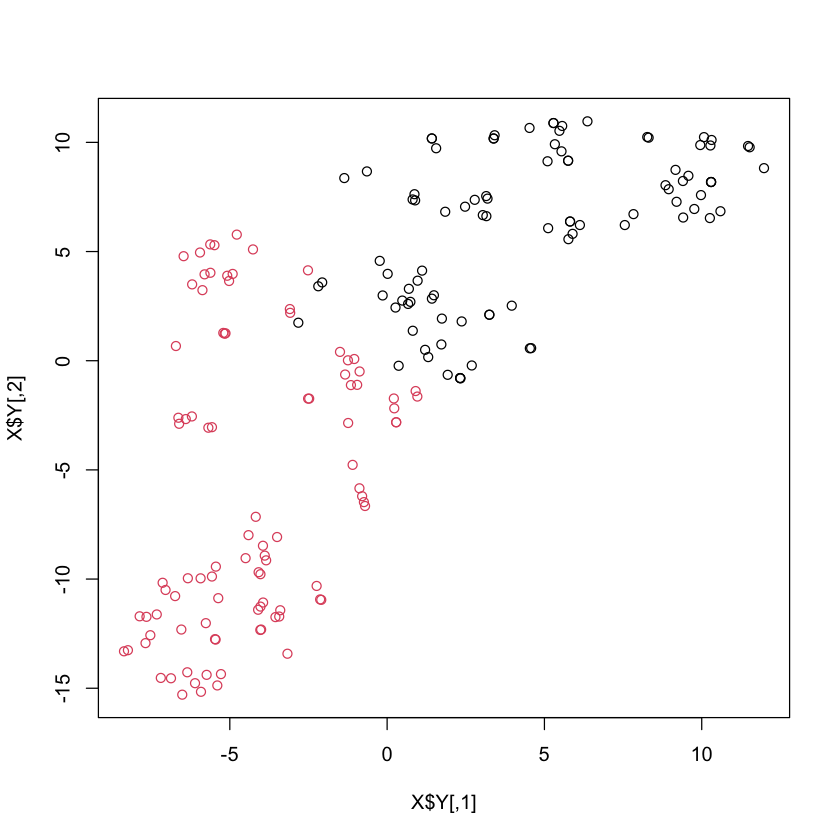

In [22]:
cl2 <- kkmeans(as.kernelMatrix(K$kernel), centers = 2)
plot(X$Y, col = cl2@.Data)

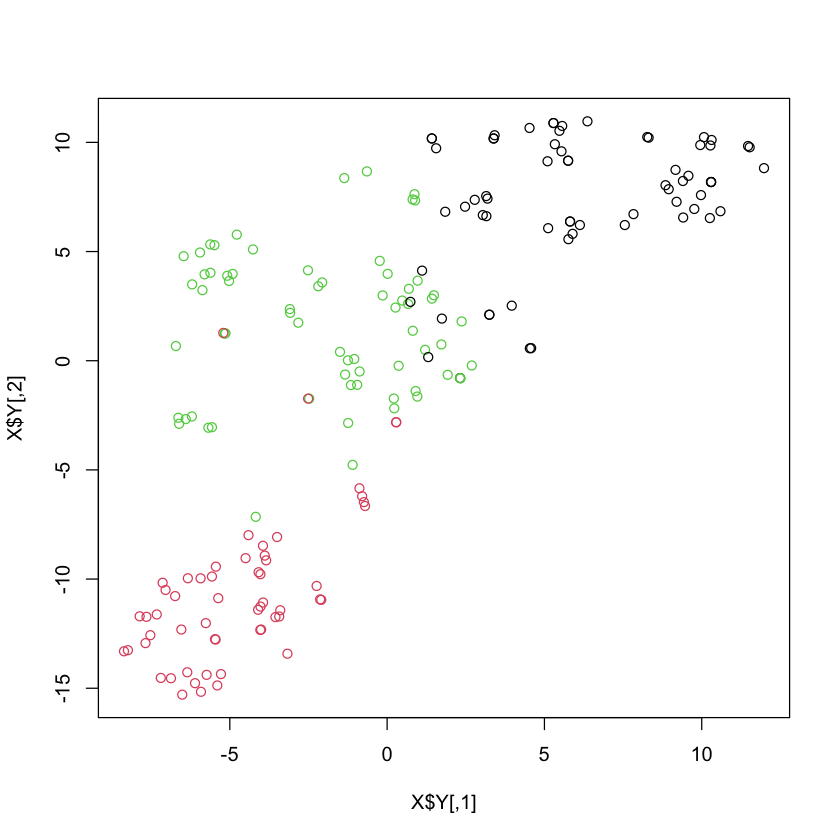

In [23]:
cl3 <- kkmeans(as.kernelMatrix(K$kernel), centers = 3)
plot(X$Y, col = cl3@.Data)